In [1]:
## Ignore warning
import warnings 
warnings.filterwarnings('ignore') 

# Data processing and analysis libraries
import numpy as np
import pandas as pd
import re

# Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Configure visualisations
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
submission_df = pd.read_csv('data/gender_submission.csv')
IDtest = test_df['PassengerId']
IDtest

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

# Data Exploration

In [3]:
print(f'The shape of the training set : ', (train_df.shape))
print(f'The shape of the test set : ', (test_df.shape))
print(f'The shape of the submission set : ', (submission_df.shape))

The shape of the training set :  (891, 12)
The shape of the test set :  (418, 11)
The shape of the submission set :  (418, 2)


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
var1 = [col for col in train_df.columns if train_df[col].isnull().sum() != 0]
print(train_df[var1].isnull().sum())

Age         177
Cabin       687
Embarked      2
dtype: int64


In [9]:
var2 = [col for col in test_df.columns if test_df[col].isnull().sum() != 0]
print(test_df[var2].isnull().sum())

Age       86
Fare       1
Cabin    327
dtype: int64


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
categorical1 = [var for var in train_df.columns if train_df[var].dtype =='O']
print('There are {} categorical variables in training set.\n'.format(len(categorical1)))
print('The categorical variables are :', categorical1)

There are 5 categorical variables in training set.

The categorical variables are : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [13]:
numerical1 = [var for var in train_df.columns if train_df[var].dtype !='O']
print('There are {} numerical variables in training set.\n'.format(len(numerical1)))
print('The numerical variables are :', numerical1)

There are 7 numerical variables in training set.

The numerical variables are : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [14]:
categorical2 = [var for var in test_df.columns if test_df[var].dtype =='O']
print('There are {} categorical variables in test set.\n'.format(len(categorical2)))
print('The categorical variables are :', categorical2)

There are 5 categorical variables in test set.

The categorical variables are : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [15]:
numerical2 = [var for var in test_df.columns if test_df[var].dtype !='O']
print('There are {} numerical variables in test set.\n'.format(len(numerical2)))
print('The numerical variables are :', numerical2)

There are 6 numerical variables in test set.

The numerical variables are : ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# Data Visualization

***Missing values***

<Axes: >

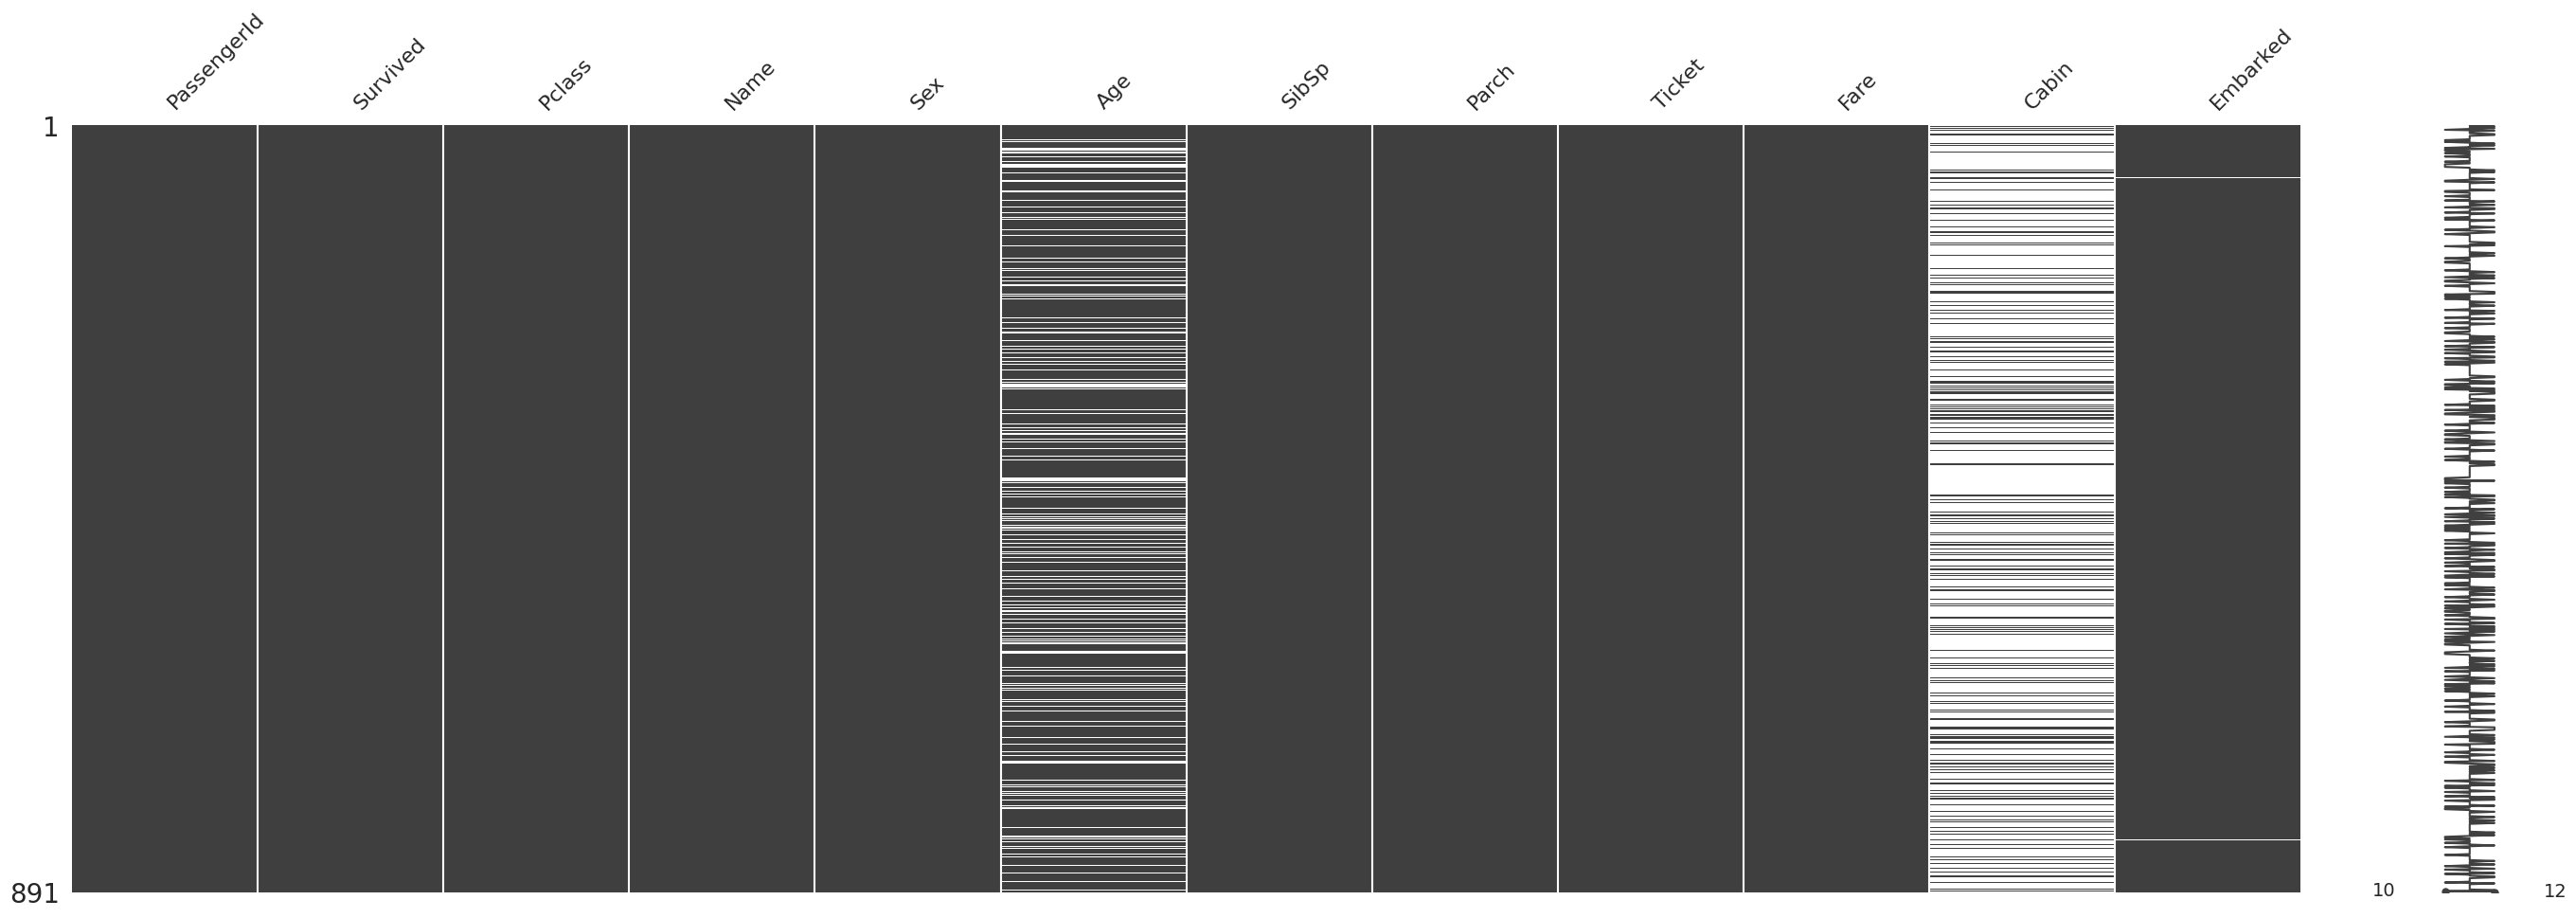

In [16]:
msno.matrix(train_df, figsize = (30,10))

<Axes: >

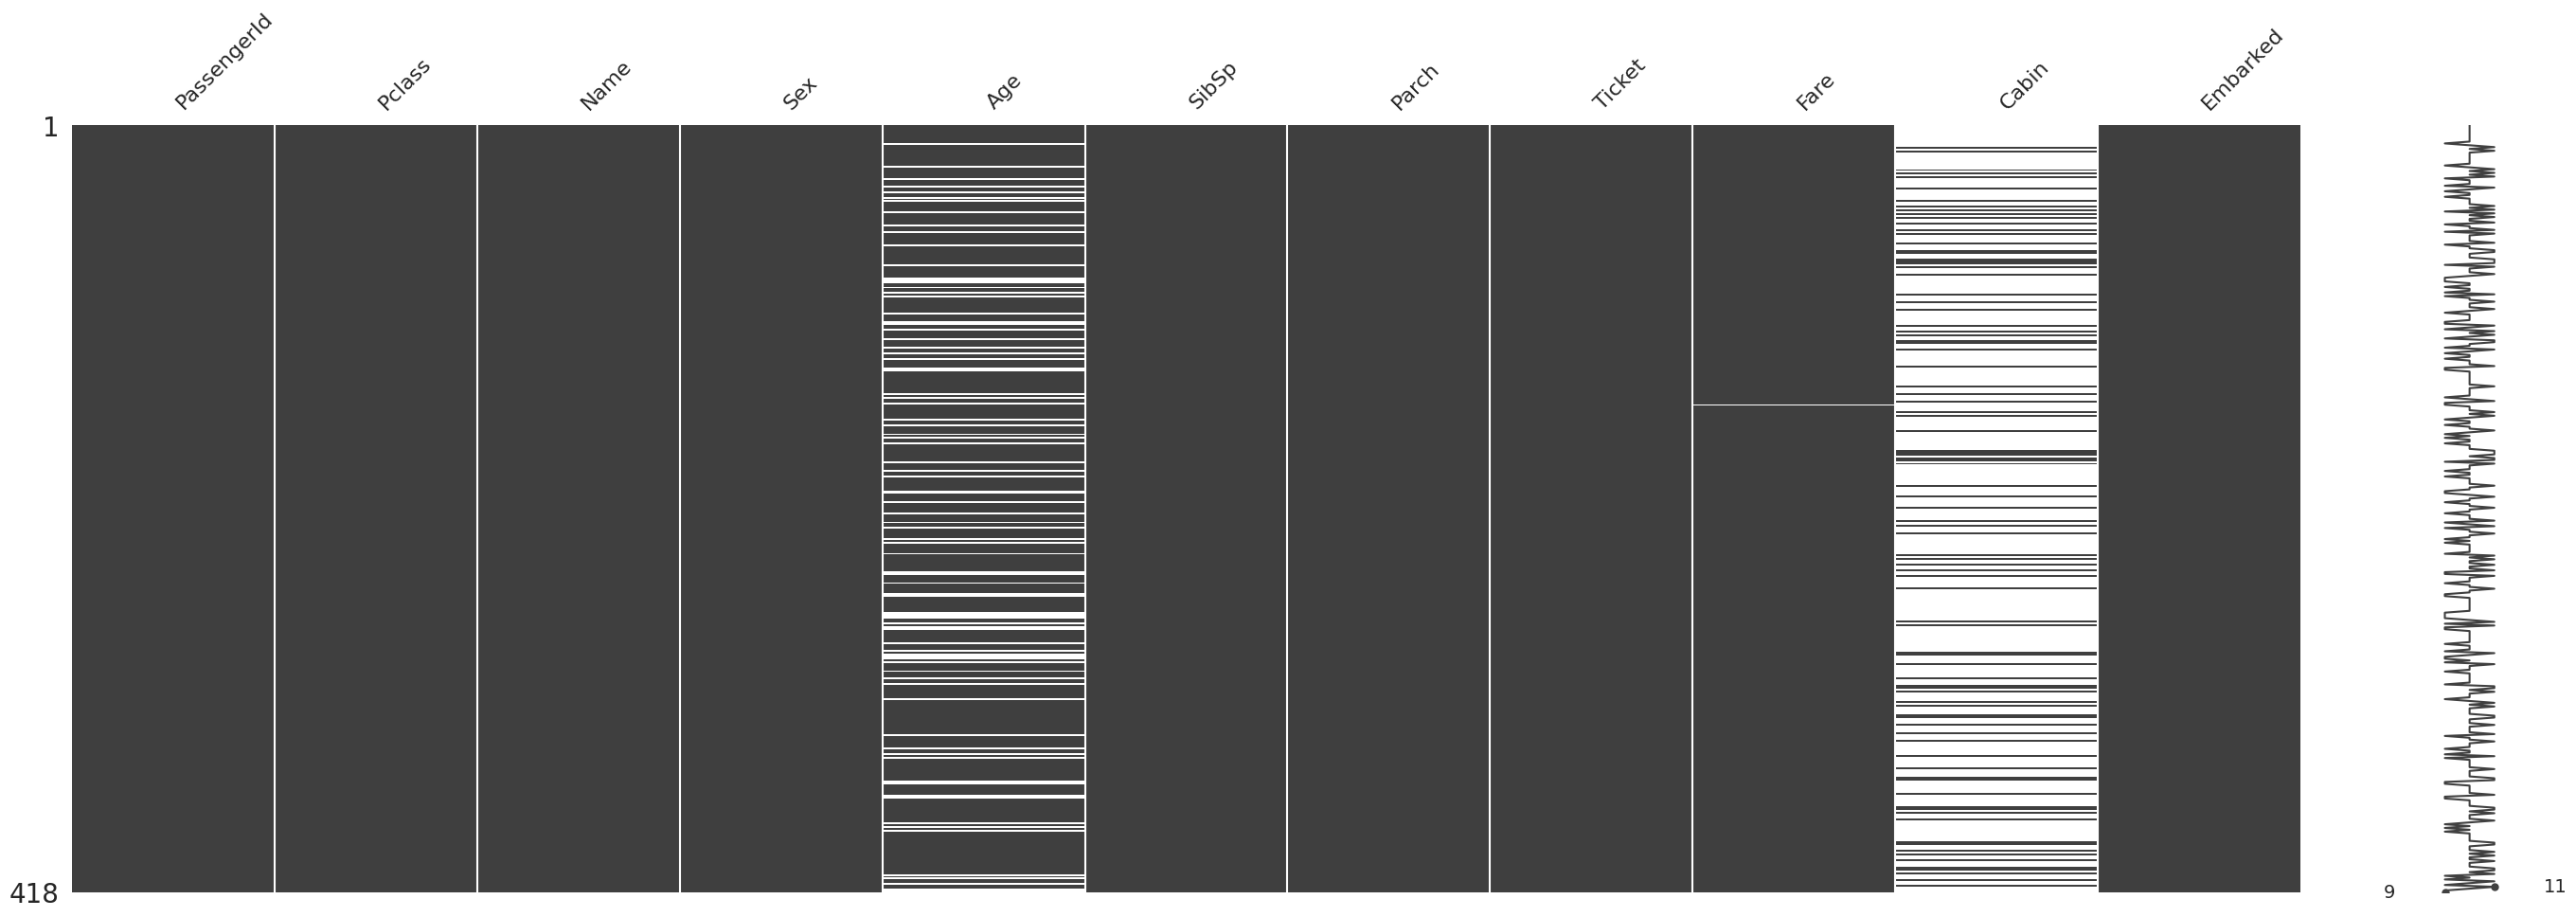

In [17]:
# view missing values in test set

msno.matrix(test_df, figsize = (30,10))

In [18]:
train_df['Survived'].value_counts()
#Here 0 stands for not survived and 1 stands for survived.

Survived
0    549
1    342
Name: count, dtype: int64

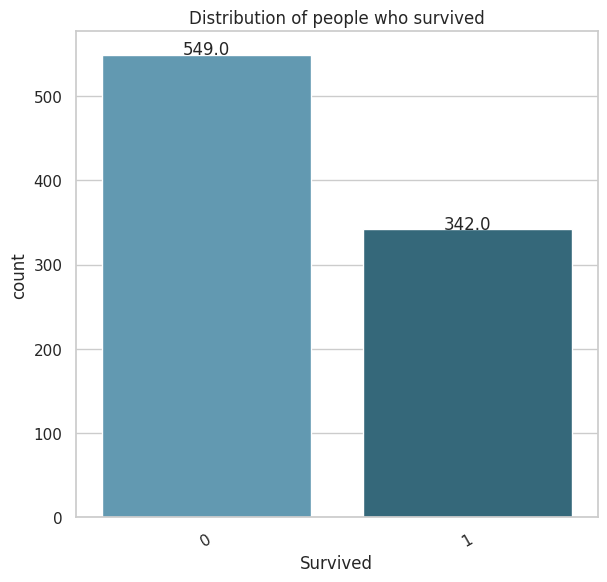

In [19]:
fig, ax = plt.subplots(figsize=(6,6))
graph = sns.countplot(ax=ax,x=train_df['Survived'], data = train_df, palette = 'PuBuGn_d')
graph.set_title('Distribution of people who survived', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [20]:
train_df.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

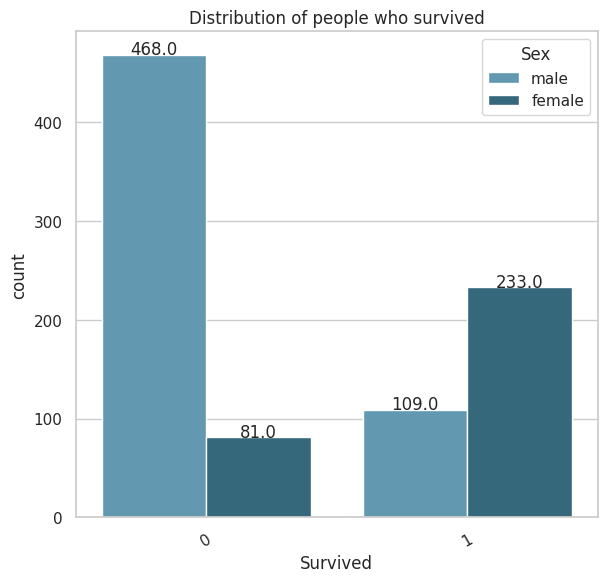

In [21]:
fig, ax = plt.subplots(figsize=(6,6))
graph = sns.countplot(ax=ax,x=train_df['Survived'], data = train_df, hue='Sex', palette = 'PuBuGn_d')
graph.set_title('Distribution of people who survived', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [22]:
females = train_df[train_df['Sex'] == 'female']
females.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
females['Survived'].value_counts()/len(females)

Survived
1    0.742038
0    0.257962
Name: count, dtype: float64

In [24]:
males = train_df[train_df['Sex'] == 'male']
males.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [25]:
males['Survived'].value_counts()/len(males)

Survived
0    0.811092
1    0.188908
Name: count, dtype: float64

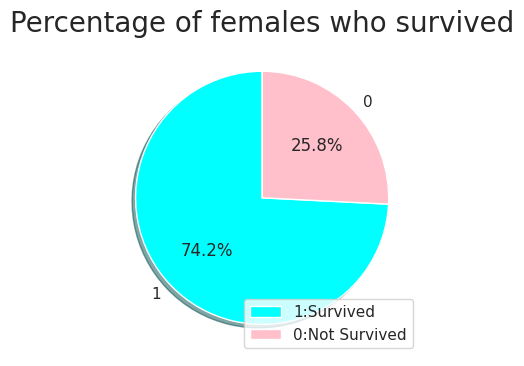

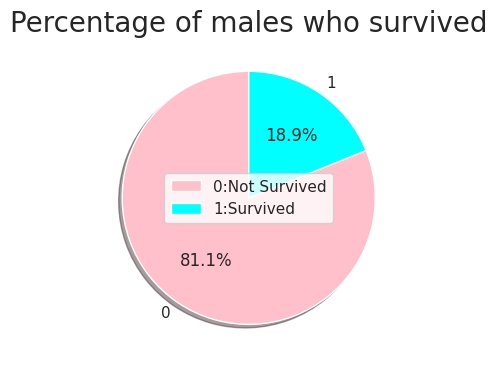

In [26]:
# create the first of two pie-charts and set current axis
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)   # (rows, columns, panel number)
labels1 = females['Survived'].value_counts().index
size1 = females['Survived'].value_counts()
colors1=['cyan','pink']
plt.pie(size1, labels = labels1, colors = colors1, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Percentage of females who survived', fontsize = 20)
plt.legend(['1:Survived', '0:Not Survived'], loc=0)
plt.show()

# create the second of two pie-charts and set current axis
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 2)   # (rows, columns, panel number)
labels2 = males['Survived'].value_counts().index
size2 = males['Survived'].value_counts()
colors2=['pink','cyan']
plt.pie(size2, labels = labels2, colors = colors2, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Percentage of males who survived', fontsize = 20)
plt.legend(['0:Not Survived','1:Survived'])
plt.show()

In [27]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

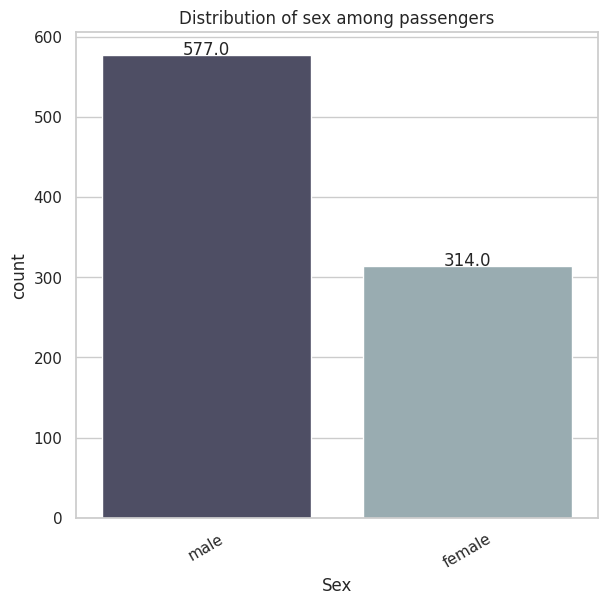

In [28]:
fig, ax = plt.subplots(figsize=(6,6))
graph = sns.countplot(ax=ax,x=train_df['Sex'], data=train_df, palette = 'bone')
graph.set_title('Distribution of sex among passengers', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [29]:
train_df['Sex'].value_counts()/len(train_df)

Sex
male      0.647587
female    0.352413
Name: count, dtype: float64

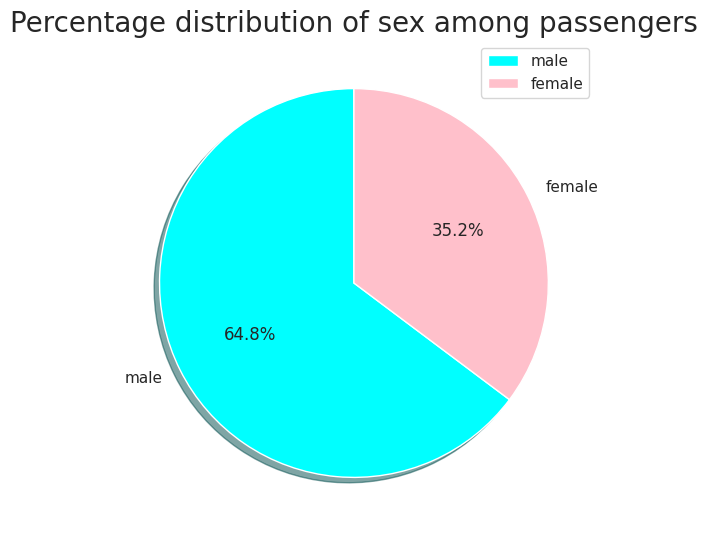

In [30]:
plt.figure(figsize=(8,6))
labels = train_df['Sex'].value_counts().index
size = train_df['Sex'].value_counts()
colors=['cyan','pink']
plt.pie(size, labels = labels, shadow = True, colors=colors, autopct='%1.1f%%',startangle = 90)
plt.title('Percentage distribution of sex among passengers', fontsize = 20)
plt.legend()
plt.show()

In [31]:
train_df.groupby('Pclass')['Sex'].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: count, dtype: int64

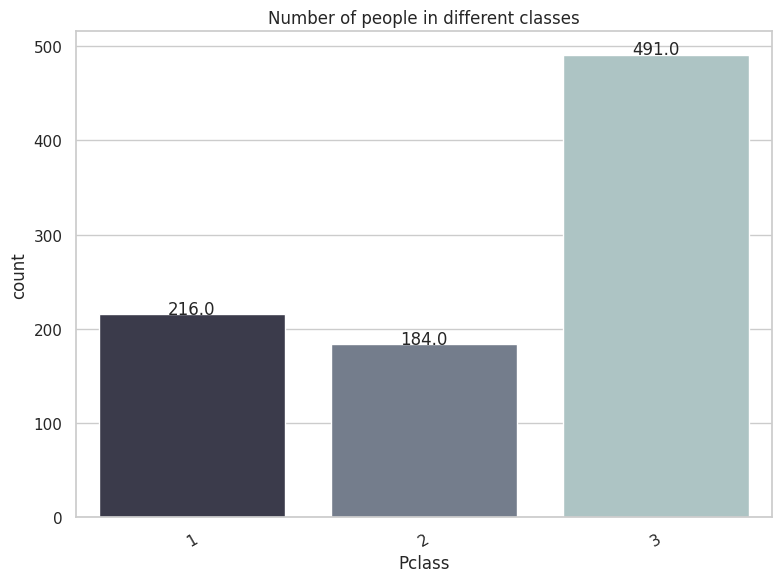

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=train_df['Pclass'], data=train_df, palette = 'bone')
graph.set_title('Number of people in different classes', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

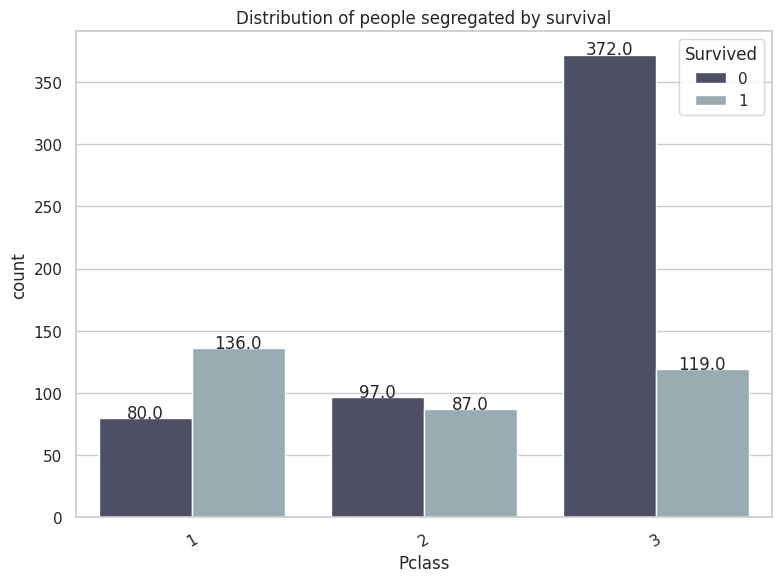

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=train_df['Pclass'], data=train_df, hue='Survived', palette = 'bone')
graph.set_title('Distribution of people segregated by survival', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

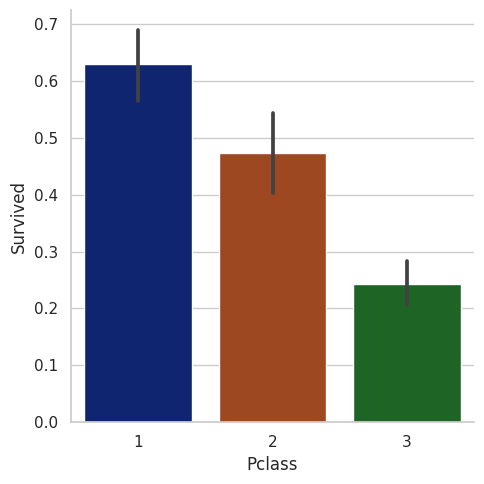

In [34]:
# percentage of survivors per class
sns.catplot(x='Pclass', y='Survived', data=train_df, kind='bar')

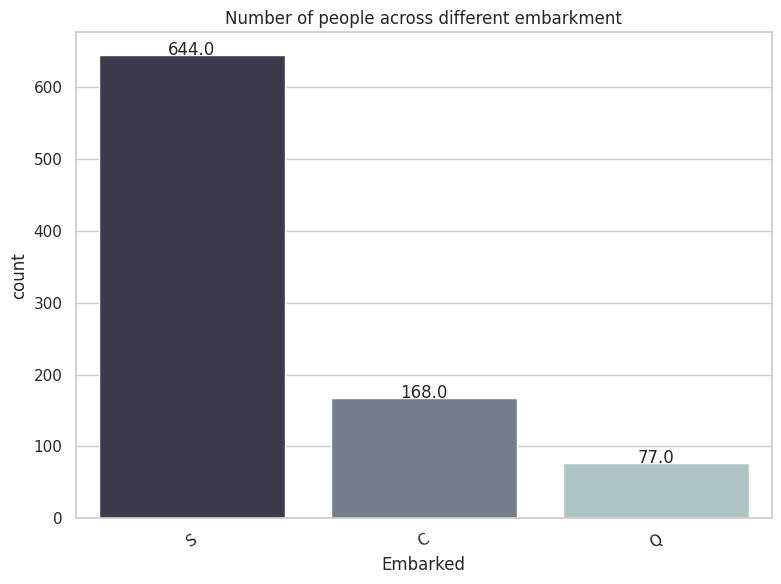

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=train_df['Embarked'], data=train_df, palette = 'bone')
graph.set_title('Number of people across different embarkment', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

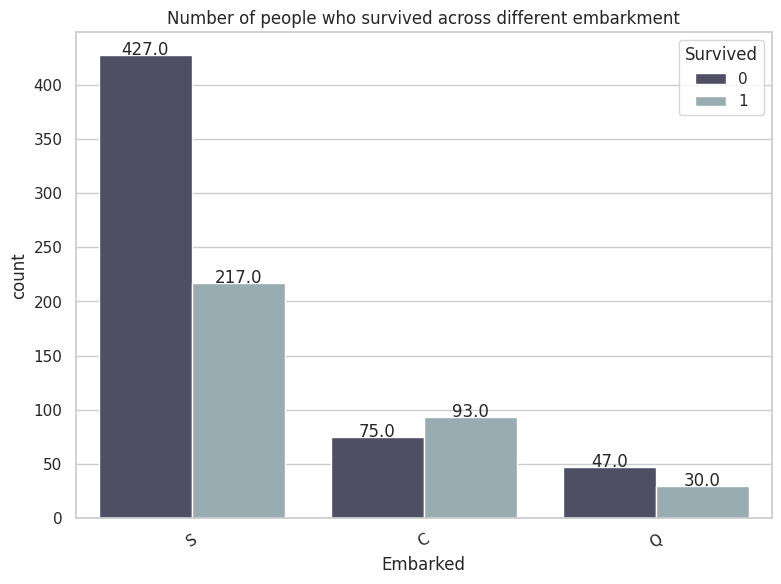

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=train_df['Embarked'], data=train_df, hue='Survived', palette = 'bone')
graph.set_title('Number of people who survived across different embarkment', fontsize = 12)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

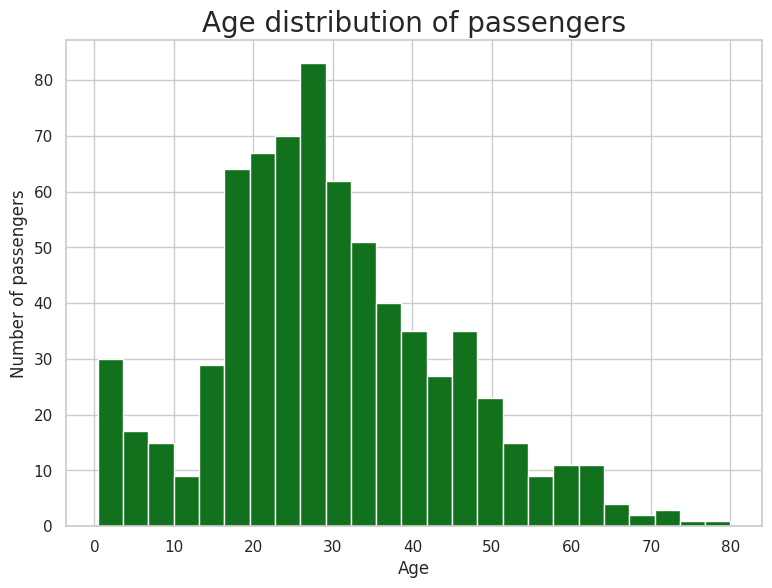

In [37]:
x = train_df['Age']
plt.figure(figsize=(8,6))
plt.hist(x, bins=25, color='g')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Age distribution of passengers', fontsize = 20)
plt.show()

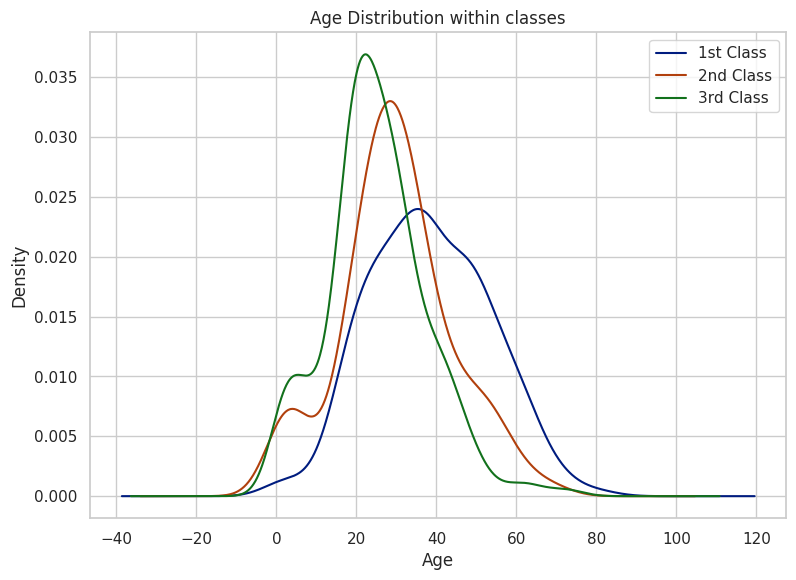

In [38]:
plt.figure(figsize=(8,6))
train_df.Age[train_df.Pclass == 1].plot(kind='kde')    
train_df.Age[train_df.Pclass == 2].plot(kind='kde')
train_df.Age[train_df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

***Visualizations about training set***

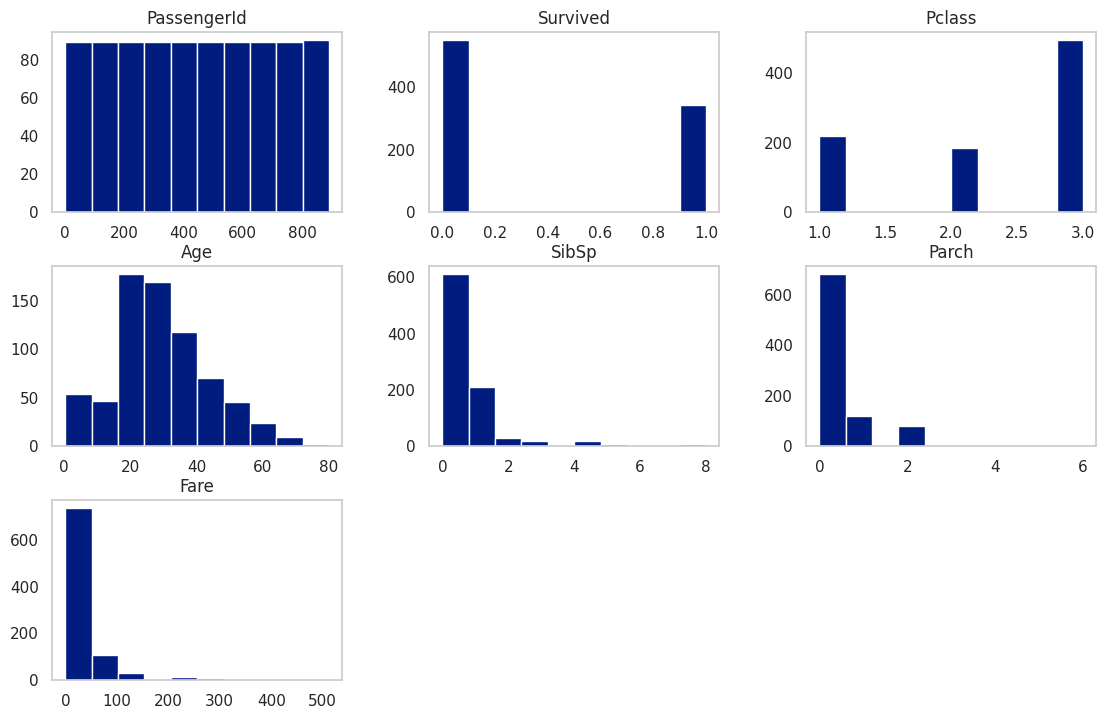

In [39]:
train_df.hist(bins=10,figsize=(12,8),grid=False);

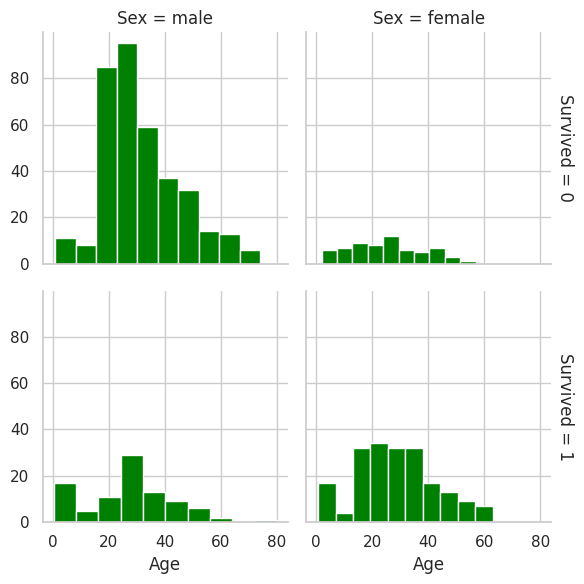

In [40]:
g = sns.FacetGrid(train_df, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age", color="green");

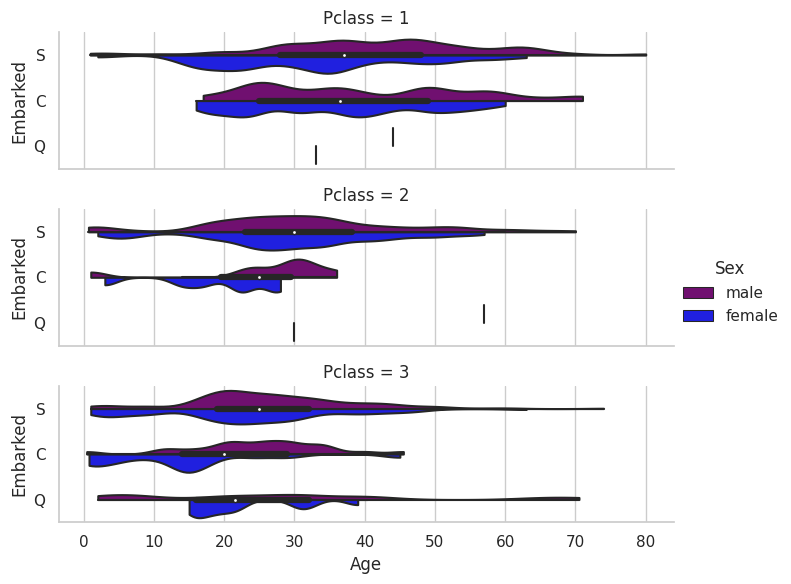

In [41]:
g = sns.catplot(x="Age", y="Embarked", hue="Sex", row="Pclass",
                data=train_df[train_df.Embarked.notnull()],
                orient="h", height=2, aspect=3.5,
                palette={'male': "purple", 'female': "blue"},
                kind="violin", split=True, cut=0, bw=.2)

# Data Preprocessing 

In [42]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


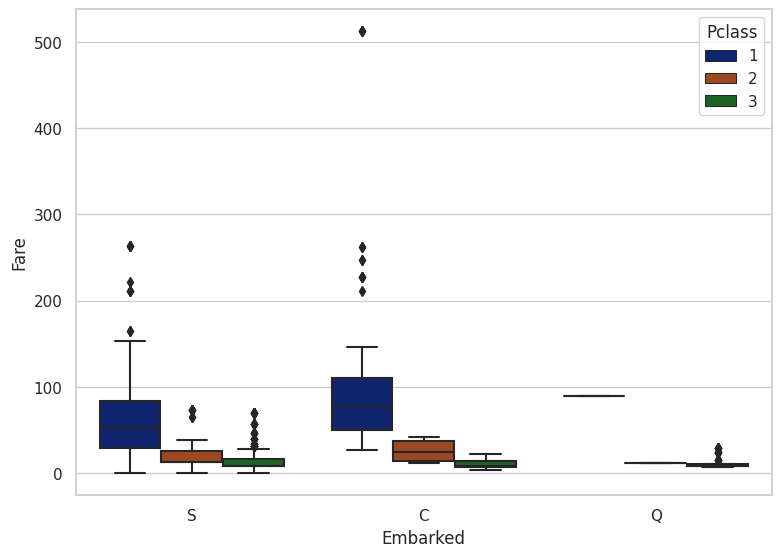

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train_df)
plt.show()

In [44]:
train_df["Embarked"] = train_df["Embarked"].fillna('C')

In [45]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [46]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [47]:
def fill_missing_fare(df):
    median_fare=df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
    df["Fare"] = df["Fare"].fillna(median_fare)
    return df

test_df=fill_missing_fare(test_df)

# Feature Engineering

In [48]:
train_df["Deck"]=train_df.Cabin.str[0]
test_df["Deck"]=test_df.Cabin.str[0]
train_df["Deck"].unique() # 0 is for null value

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

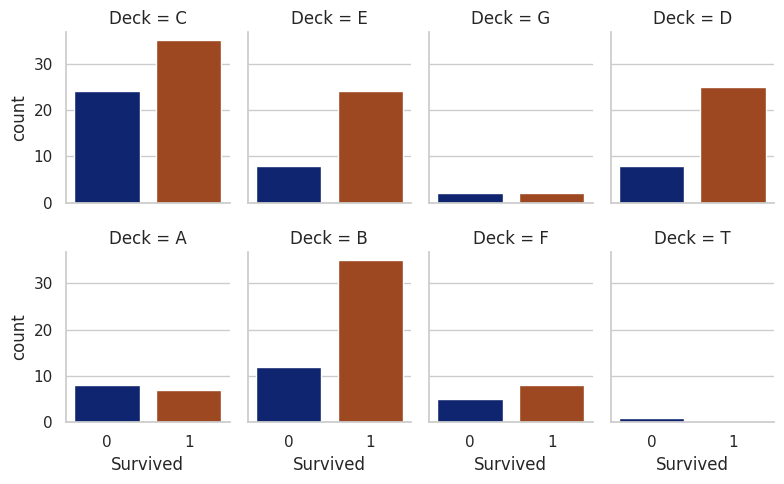

In [49]:
g = sns.catplot(x="Survived", col="Deck", col_wrap=4,
                data=train_df[train_df.Deck.notnull()],
                kind="count", height=2.5, aspect=.8)

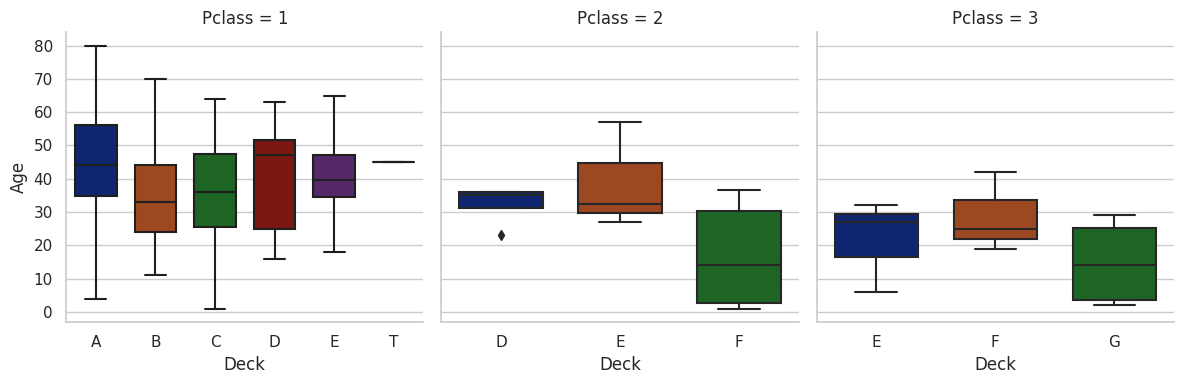

In [50]:
train_df = train_df.assign(Deck=train_df.Deck.astype(object)).sort_values("Deck")
g = sns.catplot(data=train_df, x="Deck", y="Age", col="Pclass", kind="box",
                sharex=False, height=4, aspect=1, width=0.7)

In [51]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"]+1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"]+1
print(train_df["FamilySize"].value_counts())

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64


In [52]:
# Discretize family size
train_df.loc[train_df["FamilySize"] == 1, "FsizeD"] = 'singleton'
train_df.loc[(train_df["FamilySize"] > 1)  &  (train_df["FamilySize"] < 5) , "FsizeD"] = 'small'
train_df.loc[train_df["FamilySize"] >4, "FsizeD"] = 'large'

test_df.loc[test_df["FamilySize"] == 1, "FsizeD"] = 'singleton'
test_df.loc[(test_df["FamilySize"] >1) & (test_df["FamilySize"] <5) , "FsizeD"] = 'small'
test_df.loc[test_df["FamilySize"] >4, "FsizeD"] = 'large'

In [53]:
train_df["NameLength"] = train_df["Name"].apply(lambda x: len(x))
test_df["NameLength"] = test_df["Name"].apply(lambda x: len(x))
bins = [0, 20, 40, 57, 85]
group_names = ['short', 'okay', 'good', 'long']
train_df['NlengthD'] = pd.cut(train_df['NameLength'], bins, labels=group_names)
test_df['NlengthD'] = pd.cut(test_df['NameLength'], bins, labels=group_names)

In [54]:
import re

#A function to get the title from a name.
def get_title(name):
    """Use a regular expression to search for a title.  
       Titles always consist of capital and lowercase letters, and end with a period"""
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [55]:
#Get all the titles and print how often each one occurs.
titles = train_df["Name"].apply(get_title)
print(pd.value_counts(titles))

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Sir           1
Mme           1
Countess      1
Capt          1
Don           1
Ms            1
Jonkheer      1
Name: count, dtype: int64


In [56]:
#Add in the title column.
train_df["Title"] = titles

In [57]:
# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

In [58]:
# Also reassign mlle, ms, and mme accordingly
train_df.loc[train_df["Title"] == "Mlle", "Title"] = 'Miss'
train_df.loc[train_df["Title"] == "Ms", "Title"] = 'Miss'
train_df.loc[train_df["Title"] == "Mme", "Title"] = 'Mrs'
train_df.loc[train_df["Title"] == "Dona", "Title"] = 'Rare Title'
train_df.loc[train_df["Title"] == "Lady", "Title"] = 'Rare Title'
train_df.loc[train_df["Title"] == "Countess", "Title"] = 'Rare Title'
train_df.loc[train_df["Title"] == "Capt", "Title"] = 'Rare Title'
train_df.loc[train_df["Title"] == "Col", "Title"] = 'Rare Title'
train_df.loc[train_df["Title"] == "Don", "Title"] = 'Rare Title'
train_df.loc[train_df["Title"] == "Major", "Title"] = 'Rare Title'
train_df.loc[train_df["Title"] == "Rev", "Title"] = 'Rare Title'
train_df.loc[train_df["Title"] == "Sir", "Title"] = 'Rare Title'
train_df.loc[train_df["Title"] == "Jonkheer", "Title"] = 'Rare Title'
train_df.loc[train_df["Title"] == "Dr", "Title"] = 'Rare Title'

In [59]:
titles = test_df["Name"].apply(get_title)
print(pd.value_counts(titles))

Name
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [60]:
#Add in the title column.
test_df["Title"] = titles

In [61]:
# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

In [62]:
# Also reassign mlle, ms, and mme accordingly
test_df.loc[test_df["Title"] == "Mlle", "Title"] = 'Miss'
test_df.loc[test_df["Title"] == "Ms", "Title"] = 'Miss'
test_df.loc[test_df["Title"] == "Mme", "Title"] = 'Mrs'
test_df.loc[test_df["Title"] == "Dona", "Title"] = 'Rare Title'
test_df.loc[test_df["Title"] == "Lady", "Title"] = 'Rare Title'
test_df.loc[test_df["Title"] == "Countess", "Title"] = 'Rare Title'
test_df.loc[test_df["Title"] == "Capt", "Title"] = 'Rare Title'
test_df.loc[test_df["Title"] == "Col", "Title"] = 'Rare Title'
test_df.loc[test_df["Title"] == "Don", "Title"] = 'Rare Title'
test_df.loc[test_df["Title"] == "Major", "Title"] = 'Rare Title'
test_df.loc[test_df["Title"] == "Rev", "Title"] = 'Rare Title'
test_df.loc[test_df["Title"] == "Sir", "Title"] = 'Rare Title'
test_df.loc[test_df["Title"] == "Jonkheer", "Title"] = 'Rare Title'
test_df.loc[test_df["Title"] == "Dr", "Title"] = 'Rare Title'

In [63]:
test_df["Title"].value_counts()

Title
Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      6
Name: count, dtype: int64

In [64]:
train_df["Ticket"].tail()

884    SOTON/OQ 392076
885             382652
886             211536
888         W./C. 6607
890             370376
Name: Ticket, dtype: object

In [65]:
train_df["TicketNumber"] = train_df["Ticket"].str.extract('(\d{2,})', expand=True)
train_df["TicketNumber"] = train_df["TicketNumber"].apply(pd.to_numeric)

In [66]:
test_df["TicketNumber"] = test_df["Ticket"].str.extract('(\d{2,})', expand=True)
test_df["TicketNumber"] = test_df["TicketNumber"].apply(pd.to_numeric)

In [67]:
train_df[train_df["TicketNumber"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5,E77,S,E,1,singleton,17,short,Mrs,NaN
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,NaN,1,singleton,19,short,Mr,NaN
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,NaN,1,singleton,28,okay,Mr,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,NaN,1,singleton,31,okay,Mr,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,NaN,1,singleton,19,short,Mr,NaN
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5,NaN,S,NaN,1,singleton,24,okay,Mr,NaN


In [68]:
train_df.TicketNumber.fillna(train_df["TicketNumber"].median(), inplace=True)
test_df.TicketNumber.fillna(test_df["TicketNumber"].median(), inplace=True)

In [69]:
# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier


# Data preprocessing :
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


# Modeling helper functions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score


# Classification metrices
from sklearn.metrics import accuracy_score

#  Categorical Encoding 

In [70]:
labelenc=LabelEncoder()

cat_vars=['Embarked','Sex',"Title","FsizeD","NlengthD",'Deck']
for col in cat_vars:
    train_df[col]=labelenc.fit_transform(train_df[col])
    test_df[col]=labelenc.fit_transform(test_df[col])

In [71]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
475,476,0,1,"Clifford, Mr. George Quincy",1,NaN,0,0,110465,52.0000,A14,2,0,1,1,27,2,2,110465.0
174,175,0,1,"Smith, Mr. James Clinch",1,56.0,0,0,17764,30.6958,A7,0,0,1,1,23,2,2,17764.0
209,210,1,1,"Blank, Mr. Henry",1,40.0,0,0,112277,31.0000,A31,0,0,1,1,16,3,2,112277.0
445,446,1,1,"Dodge, Master. Washington",1,4.0,0,2,33638,81.8583,A34,2,0,3,2,25,2,0,33638.0
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",1,56.0,0,0,13213,35.5000,A26,0,0,1,1,35,2,4,13213.0


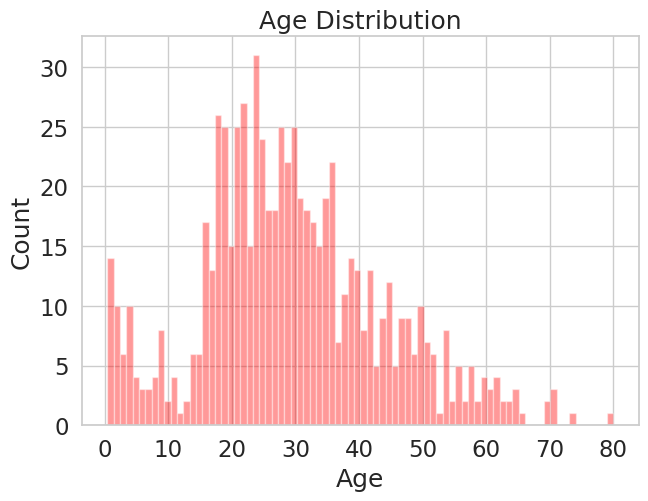

In [72]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(train_df["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="red")
    plt.title("Age Distribution")
    plt.ylabel("Count");

In [73]:
from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest
def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp',
                 'TicketNumber', 'Title','Pclass','FamilySize',
                 'FsizeD','NameLength',"NlengthD",'Deck']]
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

In [74]:
train_df=fill_missing_age(train_df)
test_df=fill_missing_age(test_df)

# Feature Scaling

In [75]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(train_df[['Age', 'Fare']])
train_df[['Age', 'Fare']] = std_scale.transform(train_df[['Age', 'Fare']])


std_scale = preprocessing.StandardScaler().fit(test_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = std_scale.transform(test_df[['Age', 'Fare']])

#  Declare feature vector and target label

In [77]:
# Declare feature vector and target variable
X_train = train_df.drop(labels = ['Survived'],axis = 1)
y_train = train_df['Survived']
X_test = test_df

# Individual Classifiers

In [82]:
# Initializing Support Vector classifier
clf_svc = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)

# Initializing Multi-layer perceptron  classifier
clf_mlp = MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (10,10,10),
                            learning_rate = "constant", max_iter = 2000, random_state = 1000)

# Initialing Nu Support Vector classifier
clf_nusvc = NuSVC(degree = 1, kernel = "rbf", nu = 0.25, probability = True)

# Initializing Random Forest classifier
clf_rfc = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 10,
                                    min_samples_leaf = 0.005,
                                     min_samples_split = 0.005, n_jobs = -1, random_state = 1000)

In [83]:
classifiers = [('svc', clf_svc),
               ('mlp', clf_mlp),                             
               ('nusvc', clf_nusvc),
               ('rfc', clf_rfc)]

In [84]:
clf = StackingClassifier(estimators=classifiers, 
                         final_estimator=LogisticRegression(),
                         stack_method='auto',
                         n_jobs=-1,
                         passthrough=False)

In [85]:
predictors=["Pclass", "Sex", "Age", "Fare", "Embarked","NlengthD",
              "FsizeD", "Title","Deck","NameLength","TicketNumber"]

clf.fit(X_train[predictors],y_train)

StackingClassifier(estimators=[('svc',
                                SVC(C=50, degree=1, gamma='auto',
                                    probability=True)),
                               ('mlp',
                                MLPClassifier(alpha=0.1,
                                              hidden_layer_sizes=(10, 10, 10),
                                              max_iter=2000,
                                              random_state=1000)),
                               ('nusvc',
                                NuSVC(degree=1, nu=0.25, probability=True)),
                               ('rfc',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=0.005,
                                                       min_samples_split=0.005,
                                                       n_estimators=500,
                                                       n_jobs=-1,
                                                       random_state=1000))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [86]:
test_predictions=clf.predict(X_test[predictors])

In [87]:
test_predictions=test_predictions.astype(int)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": test_predictions
    })

submission.to_csv("titanic_submission.csv", index=False)